In [1]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [2]:
imageFolder = "-images_6"

folders = os.listdir(imageFolder)
num_categories = len(folders)

try:
    folders.remove('.DS_Store') # required for OSX
except ValueError:
    print ".DS_Store not found"

print folders

num_classes = len(folders)

.DS_Store not found
['0', '1', '2', '3', '4', '5']


In [3]:
# specify desired image properties
# in this case we want black and white square images
image_dim = 1 # black and white
image_size = 32 # based on CNN model setup

# create an empty array to store the image data
data = {}

# look inside each folder which represents the categories of our data
for folder in folders:
    data[folder] = []
    
    # find the files within each folder
    fileNames = os.listdir("/".join([imageFolder, folder]))
    
    #print len(fileNames)
    l = len(fileNames)
    print 'number of images in folder: ', l
    # for each file, load and process each image
    # in this case we limit the number of images used per cateogry to 10,000
    # to prevent overloading our RAM memory
    for fileName in fileNames:
        
        # read in the image data into a numpy array
        if fileName == '.DS_Store': # skip any feature files
            print 'invalid filename - skipping file'
        else:
            
            img = misc.imread("/".join([imageFolder, folder, fileName]))
        
            # if the image contains more than one color channel,
            # take only the first channel (in effect, convert it to black and white)
            if image_dim == 1 and len(img.shape) > 2: 
                img = img[:,:,0] # convert to black and white
                
            target_size = int(image_size * 1.2) # crop to slightly larger than target...

            # resize to target resolution if necessary
            if img.shape[0] != image_size or img.shape[1] != image_size:
                img = misc.imresize(img, (target_size, target_size), interp='nearest')

            # normalize data by dividing by maximum pixel value
            img = img / 255.0
            img_flipped = np.fliplr(img) # flip left-right
            
            for im in [img, img_flipped]:
                # add the image data and the associated category 
                # (which is stored in the folder variable) to the data set
                # for this to work you need to make sure your folders 
                # are named sequentially starting with 0
                
                data[folder].append(im[:image_size, :image_size]) # upper left corner
                data[folder].append(im[:image_size, -image_size:]) # upper right corner
                data[folder].append(im[-image_size:, :image_size]) # lower left corner
                data[folder].append(im[-image_size:, -image_size:]) # lower right corner

print "Load data complete"

number of images in folder:  1150
number of images in folder:  702
number of images in folder:  807
number of images in folder:  1045
number of images in folder:  316
number of images in folder:  86
Load data complete


image dimensions: (32, 32)


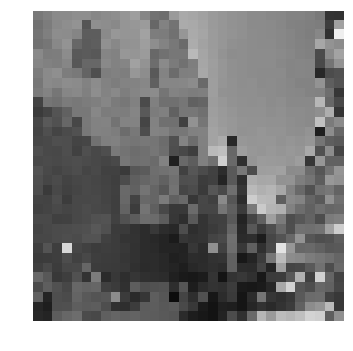

In [4]:
img = data['0'][4]
print "image dimensions:", img.shape

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
# for training, we want the same number of image patches from both categories
# first we calculate the length of the smaller data set

# shuffle all data sets and keep track of smallest
minSetLen = float('Inf')
for key in data.keys():
    random.shuffle(data[key])
    if len(data[key]) < minSetLen:
        minSetLen = len(data[key])

print "smallest set size:", minSetLen

# then we combine an equal number of patches from both categories into one data set
dataSet = []
for key in data.keys():
    for d in data[key][:minSetLen]:
        dataSet.append([d, int(key)])

# and shuffle the entire data set one more time
random.shuffle(dataSet)
        
print "num samples:", len(dataSet)

smallest set size: 688
num samples: 4128


In [6]:
# Fill target and feature data into arrays
X = np.ndarray((len(dataSet), image_size, image_size), dtype=np.float32)
y = np.ndarray((len(dataSet), 1), dtype=np.int32)

for i, d in enumerate(dataSet):
    X[i] = d[0]
    y[i] = d[1]

image dimensions: (32, 32)
target category: 1


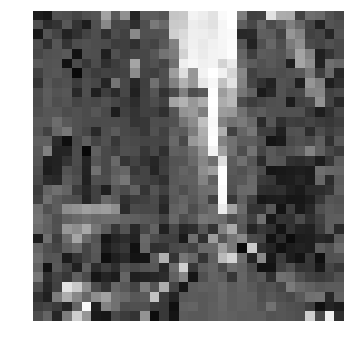

In [7]:
# Make sure we have the correct information
img_index = 0

img = X[img_index]
print "image dimensions:", img.shape
print "target category:", (range(num_classes)[y[img_index][0]])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [8]:
# Save the data file..
pickle_file = imageFolder + '.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X': X,
        'y': y,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size / 100000 / 10.0, "MB"

Saved data to -images_6.pickle
Compressed pickle size: 16.9 MB
